In [58]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
data.shape

(891, 12)

In [62]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

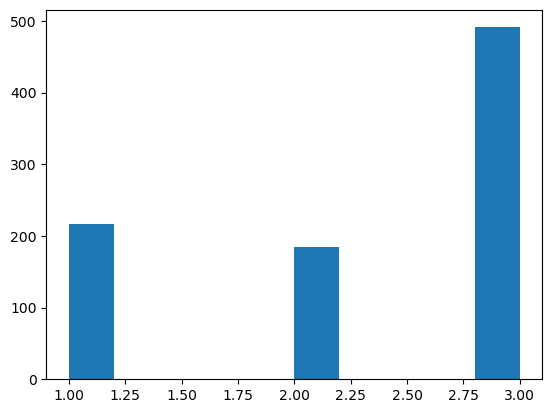

In [68]:
plt.hist(data.Pclass)

<Axes: xlabel='Pclass', ylabel='Age'>

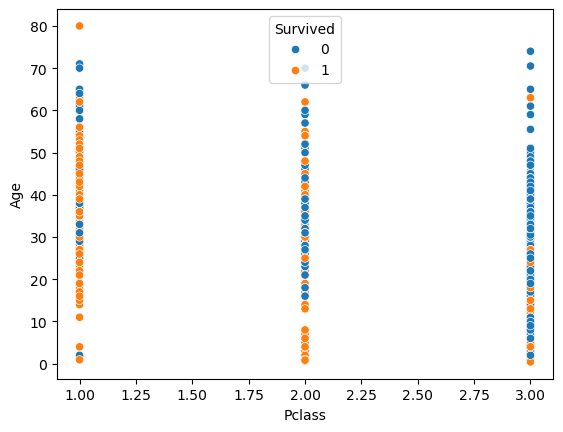

In [91]:
sns.scatterplot(x = "Pclass", y = "Age", hue = "Survived", data = data)


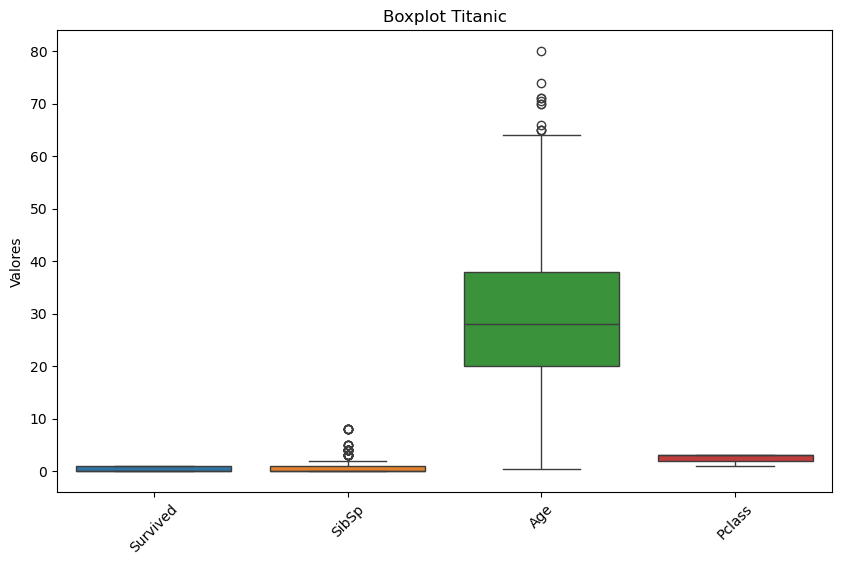

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Survived', 'SibSp', 'Age', 'Pclass']])
plt.xticks(rotation=45)
plt.title('Boxplot Titanic')
plt.ylabel('Valores')
plt.show()

In [94]:
predictors_col = ["Survived", "SibSp", "Age", "Pclass"]
target_col = ['Survived']

In [95]:
predictors = data[predictors_col]
target = data[target_col]

In [96]:
predictors

,Survived,SibSp,Age,Pclass
0,0,1,22.0,3
1,1,1,38.0,1
2,1,0,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3
...,...,...,...,...
886,0,0,27.0,2
887,1,0,19.0,1
888,0,1,NaN,3
889,1,0,26.0,1


In [97]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [98]:
corr = predictors.corr()
corr

,Survived,SibSp,Age,Pclass
Survived,1.000000,-0.035322,-0.077221,-0.338481
SibSp,-0.035322,1.000000,-0.308247,0.083081
Age,-0.077221,-0.308247,1.000000,-0.369226
Pclass,-0.338481,0.083081,-0.369226,1.000000


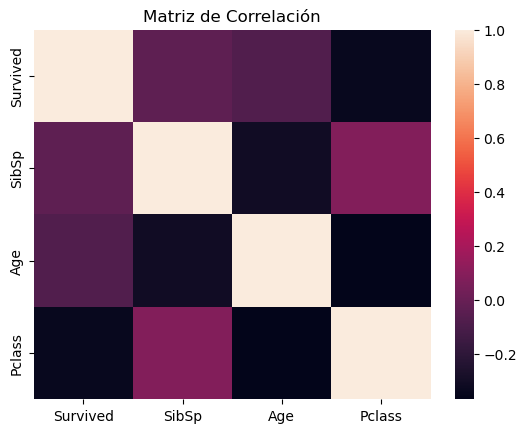

In [99]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [101]:
tree = DecisionTreeClassifier()

In [102]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 439\nvalue = [439, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 273\nvalue = [0, 273]')]

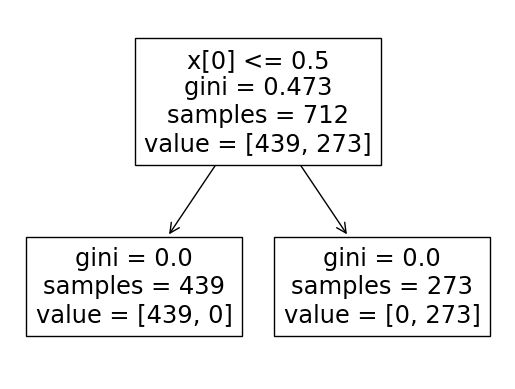

In [103]:
plot_tree(arbol)

In [104]:
predicciones = arbol.predict(X_test)

In [105]:
predicciones

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [106]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,110,0
1,0,69


In [107]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [108]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [109]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [111]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0